In [1]:
cd ../../

/vision2/u/ianhuang/VidObjClassHierarchy


In [5]:
cd utilities/handtracking/

/vision2/u/ianhuang/VidObjClassHierarchy/utilities/handtracking


In [6]:
from utils import detector_utils as detector_utils
import cv2
import tensorflow as tf
import datetime
import argparse
from scipy.misc import imread
import matplotlib.pyplot as plt

detection_graph, sess = detector_utils.load_inference_graph()

> ====== loading HAND frozen graph into memory
>  ====== Hand Inference graph loaded.


In [7]:
from skimage.transform import resize

/sailhome/ianhuang/anaconda3/envs/.vidobj/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


[0.16950735 0.10336685 0.05310902 0.01914397 0.01817194 0.01374727
 0.01191533 0.00972104 0.00810066 0.00754365 0.00753862 0.00708127
 0.0066061  0.00658584 0.00648335 0.00602686 0.00559899 0.00554553
 0.00540134 0.00484759 0.00476527 0.00474021 0.00466642 0.00456321
 0.00436103 0.00434473 0.00432539 0.00400263 0.00391319 0.0038715
 0.00377926 0.00363454 0.00349158 0.00342414 0.00326845 0.00325078
 0.00324461 0.00320929 0.00313696 0.00309339 0.00302649 0.00301221
 0.00296313 0.00289345 0.00283146 0.00270408 0.00268245 0.00259866
 0.00257322 0.00256735 0.00255609 0.00253111 0.00249124 0.00249004
 0.00247204 0.00245073 0.00241926 0.00241324 0.00236681 0.00236669
 0.00234091 0.00227541 0.00218025 0.0021601  0.00215185 0.00214919
 0.00213706 0.00212175 0.00211999 0.00211978 0.00211567 0.00207725
 0.00203618 0.00202301 0.00199464 0.00197962 0.00197646 0.00197646
 0.00195846 0.00190711 0.00185195 0.00182214 0.00181919 0.00181875
 0.00180316 0.00179914 0.00179914 0.00177789 0.00176695 0.00174

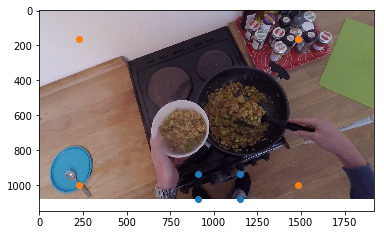

In [10]:
import os
import random 
all_files = os.listdir('../../viz/viz_data/tmp_dataset/P01/P01_01/')
file_name = all_files[random.randint(0, len(all_files))]
video_source = os.path.join('../../viz/viz_data/tmp_dataset/P01/P01_01/', file_name)
score_thresh = 0

image_np = imread(video_source) # RGB matrix
num_hands_detect = 2
boxes, scores = detector_utils.detect_objects(image_np, detection_graph, sess)
im_height, im_width = image_np.shape[0], image_np.shape[1]
plt.imshow(image_np)
print(scores)
for i in range(num_hands_detect):
    if scores[i] > score_thresh:
        (left, right, top, bottom) = (boxes[i][1] * im_width, boxes[i][3] * im_width,
                                      boxes[i][0] * im_height, boxes[i][2] * im_height)
        plt.scatter([left, left, right, right],[top, bottom, top, bottom])
        print(left, right, top, bottom)
